In [15]:
%run ./AI_Literature_Analysis.ipynb

16it [00:35,  2.25s/it]


# Topic Trends in Machine Learning
## The Increasing focus on Safety, Fairness & Interpretability

*This blog post was written as part of a paid work trial for [Epoch](https://epochai.org/). Epoch investigates and forecasts the development of advanced AI.*

## In Short

In this blog post we conduct topic analysis on all $n=155,223$ ML/AI papers, submitted to [Arxiv](https://arxiv.org/) between 2007 and 2022. This is done with state-of-the-art topic modelling techniques, utilising [BERTopic](https://arxiv.org/abs/2203.05794).

We look specifically at topics that can be considered most relavent to AI Alignment - specifically adversarial safety, fairness and interpretability. We find that this subset has grown significantly, from 0.5% to 7.2% of literature over the past 11 years.

## The Arxiv Dataset

<AxesSubplot:xlabel='update_date'>

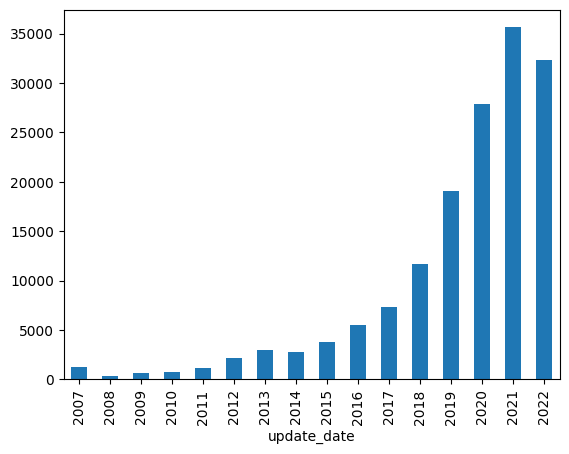

In [25]:
# Show papers over time
ai_papers["update_date"].groupby(ai_papers["update_date"].dt.year).count().plot(kind="bar")

 - [Arxiv](https://arxiv.org/) is widely used within the AI research community, to publish preprints and postprints of papers.
 - The [Arxiv dataset](https://www.kaggle.com/Cornell-University/arxiv) spans 2007-2022, including all 2.1m papers that have been published on Arxiv.
 - Each paper within the dataset is categorised according to the [Arxiv taxonomy](https://arxiv.org/category_taxonomy), such that each paper belongs to one or more categories. In addition, a team of Arxiv moderators [re-categorize papers](https://arxiv.org/help/moderation), which likely results in more robust categorization than other well-known literature datasets (e.g. [DLBP](https://dblp.org/) and the [Citation network dataset](https://www.aminer.org/citation)).
 - The dataset includes paper abstracts, which will be used for topic modelling. It does not include the full text of articles.
 - The dataset is updated automatically, on a weekly basis.
 - Varios forms of topic modelling [have previously been done](https://www.kaggle.com/datasets/Cornell-University/arxiv/code) on the whole Arxiv dataset, including utilizing [Top2Vec](https://www.kaggle.com/code/ritheshsreenivasan/top2vecdemo) and [BERTopic](https://www.kaggle.com/code/maartengr/topic-modeling-arxiv-abstract-with-bertopic). However, to our knowledge this has not been done specifically for AI related papers.

## BERTopic Modelling

### Introduction to BERTopic

> BERTopic generates topic representations through three steps. First, each document is converted to its embedding representation using a pre-trained language model. Then, before clustering these embeddings, the dimensionality of the resulting embeddings is reduced to optimize the clustering process. Lastly, from the clusters of documents, topic representations are extracted using a custom class-based variation of TF-IDF.

Source: [BERTopic: Neural topic modeling with a class-based TF-IDF procedure
](https://arxiv.org/pdf/2203.05794.pdf)

- BERTopic has been found to produce state-of-the-art topic representations on a [wide variety of tasks](https://arxiv.org/pdf/2203.05794.pdf), including [in comparison to](https://www.researchgate.net/publication/360410995_A_Topic_Modeling_Comparison_Between_LDA_NMF_Top2Vec_and_BERTopic_to_Demystify_Twitter_Posts) latent Dirichlet allocation (LDA), non-negative matrix factorization (NMF) and Top2Vec.
- It supports dynamic topic modelling (analysing trends over time).
- Our analysis uses [Maartengr's implementation](https://maartengr.github.io/BERTopic/index.html).

### Analysis

The BERTopic model was supplimented with three key modifications, from the default approach:

 - The list of stop words was supplimented to remove common terms within achademic literature in general (e.g. "research", "method", "proposed"), as well as common terms across almost all fields of ML (e.g. "algorithm", "machine", "learning").
 - Given the inherent increased complexity of academic writting as oposed to other bodies of text, the [all-mpnet-base-v2](https://huggingface.co/sentence-transformers/all-mpnet-base-v2) sentence transform model has been used to create embeddings. The BERTopic authors note this change typically results in a [higher quality model at the expense of performance](https://maartengr.github.io/BERTopic/faq.html#which-embedding-model-should-i-choose).
 - The minimum topic hyperparameter has been increased from 10 to 500, given the large size of the dataset that we're working with (the number still represents just 0.3% of papers).

### Topics Generated

 - The model generated a total of 47 topics.
 - These topics are shown below (with the top 5 keywords from each topic). These clearly represent well-defined categories within ML literature.

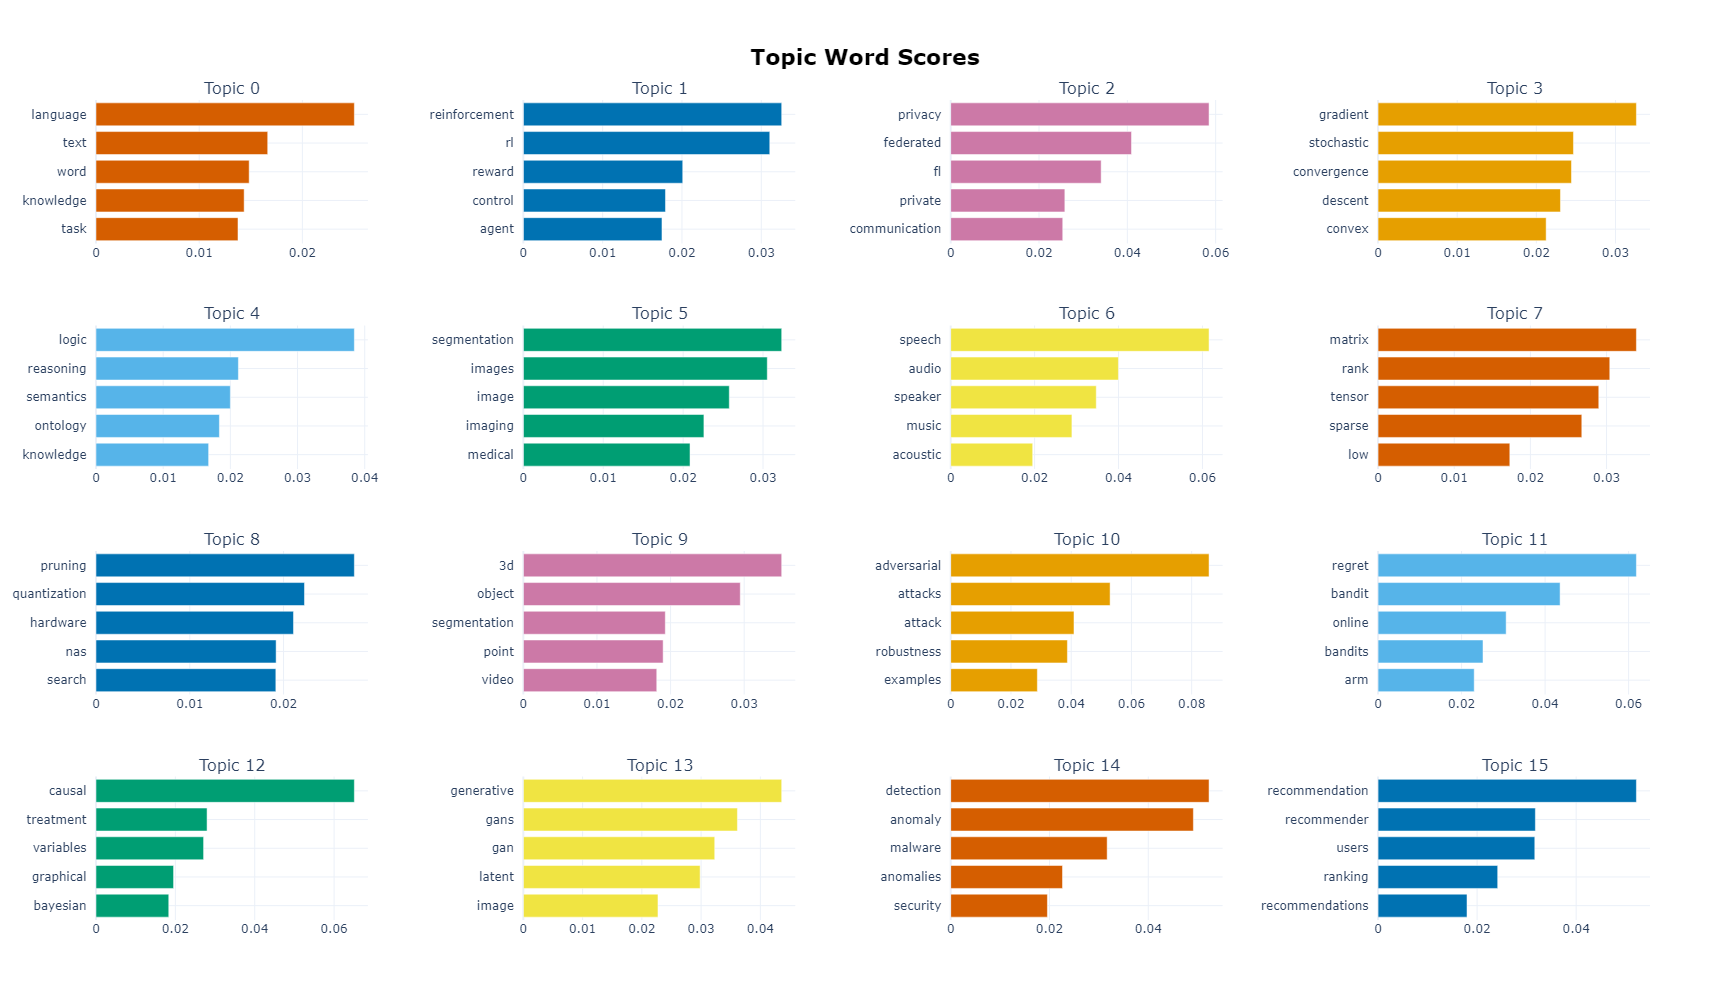

In [18]:
# Show Topics
topic_visualization

 - Conducting dimensionality reduction with [UMAP](https://umap-learn.readthedocs.io/en/latest/) we can see that these topics have clustered around a few areas (split noticibly between applied and theoretical fields).

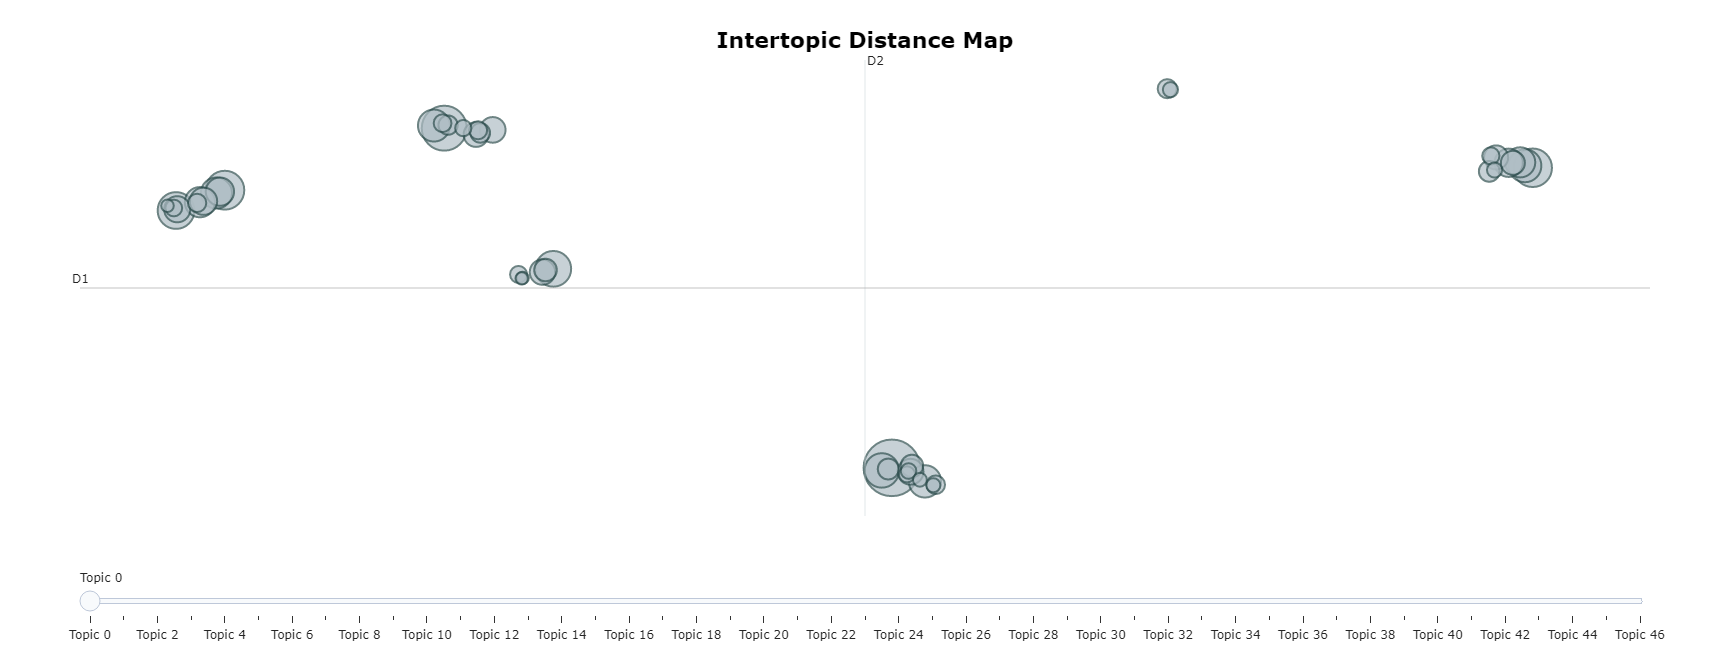

In [19]:
# Show UMAP
topic_distance

 - Examples of representitive papers were analysied to further verify that the topics were applicable. This can be seen in the appendix.

## Insights

 - Of the 47 topics generated, we consider adverserial safety research (topics 10, 14), fairness (topic 31) and interperability (topic 16) to be of most direct relevance to AI Alignment.
 - Form 2007-2022 (11 years), these topics have grown from 0.5% to 7.2% of all literature.
 - Over the past 5 years, these topics have grown from 3.9% to 7.2%.

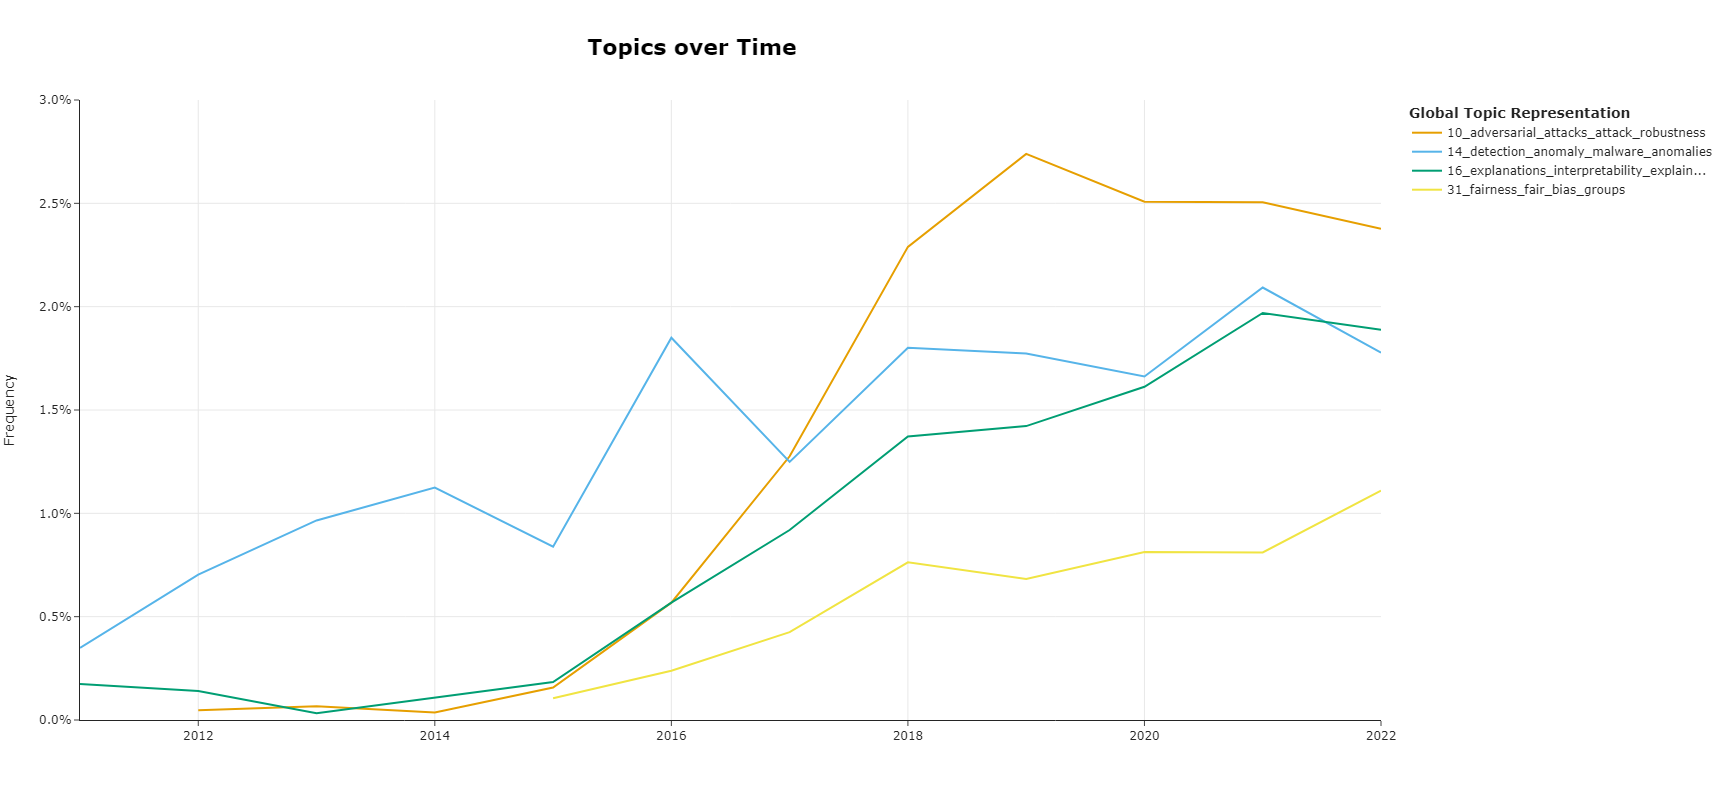

In [20]:
# Show chart with alginment categories
alignment_topic_trends_plt

 - Other topics to have increased sigifnicantly include federated learning (topic 2) which has increased from 0.8% to 4.8% over 11 years. Language analysis  (topic 0) has also increased from 2.6% to 6.2%, which may be a result of the increased prominence of large language models. 

## Caveats

 - Limited hyperparmeter analysis has been done on the minimum topic size (set to 500), and further useful work could include evaluating the conclusions of this work for different settings of this hyperparameter.
 - The Arxiv dataset is not an exhaustive collection of AI related literature. The dataset contains 155k related papers, whereas by contrast the Citation Network Dataset has a total of around [5m items](https://www.aminer.org/citation), including books and websites.
 - The grouping of topics related to alignment is inherently subjective, and may change with further developments in the field. However prominant authors e.g. Paul Christiano have argued that these topics have [important relevance to alignment](https://aiimpacts.org/conversation-with-paul-christiano/). A full list of topics is included in the appended.
 - Removal of corpus-specific words through stop words, before inference, is subject to user judgement. It [has been show](https://mimno.infosci.cornell.edu/papers/schofield_eacl_2017.pdf) that removal after inference can result in similar but more transparent results.

## Appendix

### Representative papers for each topic

In [21]:
# Show representative papers
topic_representative_papers

,Keywords,Sample 1,Sample 2,Sample 3
Topic,,,,
0,"language, text, word, knowledge, task, tasks, translation, natural, dialogue, entity",Discourse-Wizard: Discovering Deep Discourse Structure in your Conversation with RNNs,Skip-Thought Memory Networks,Conversation Learner -- A Machine Teaching Tool for Building Dialog Managers for Task-Oriented Dialog Systems
1,"reinforcement, rl, reward, control, agent, tasks, environment, state, exploration, robot",Finite-Time Analysis of Entropy-Regularized Neural Natural Actor-Critic Algorithm,Implicit Two-Tower Policies,Implicitly Regularized RL with Implicit Q-Values
2,"privacy, federated, fl, private, communication, distributed, clients, local, server, differential",Measuring the Effects of Non-Identical Data Distribution for Federated Visual Classification,(Nearly) Optimal Private Linear Regression via Adaptive Clipping,Push--Pull with Device Sampling
3,"gradient, stochastic, convergence, descent, convex, sgd, functions, function, rate, generalization",Implicit Bias of Gradient Descent on Linear Convolutional Networks,Quadratic Suffices for Over-parametrization via Matrix Chernoff Bound,Sharper Rates for Separable Minimax and Finite Sum Optimization via Primal-Dual Extragradient Methods
4,"logic, reasoning, semantics, ontology, knowledge, programming, programs, belief, sat, asp",Automatic Tabulation in Constraint Models,Alternating Fixpoint Operator for Hybrid MKNF Knowledge Bases as an Approximator of AFT,PYCSP3: Modeling Combinatorial Constrained Problems in Python
5,"segmentation, images, image, imaging, medical, ct, mri, covid, cancer, diagnosis",Wall Stress Estimation of Cerebral Aneurysm based on Zernike Convolutional Neural Networks,A Neural Ordinary Differential Equation Model for Visualizing Deep Neural Network Behaviors in Multi-Parametric MRI based Glioma Segmentation,EndoUDA: A modality independent segmentation approach for endoscopy imaging
6,"speech, audio, speaker, music, acoustic, recognition, asr, end, voice, sound",An Investigation Into On-device Personalization of End-to-end Automatic Speech Recognition Models,A holistic approach to polyphonic music transcription with neural networks,A Fully Convolutional Deep Auditory Model for Musical Chord Recognition
7,"matrix, rank, tensor, sparse, low, regression, kernel, lasso, norm, recovery",Tracing Network Evolution Using the PARAFAC2 Model,Coupled Support Tensor Machine Classification for Multimodal Neuroimaging Data,Classification and regression using an outer approximation projection-gradient method
8,"pruning, quantization, hardware, nas, search, architecture, memory, architectures, compression, devices",Quantization Loss Re-Learning Method,Compressing Convolutional Neural Networks,Semi-Relaxed Quantization with DropBits: Training Low-Bit Neural Networks via Bit-wise Regularization


### Dynamic topic analysis

In [22]:
# Show table of topics
pivot

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Change
Name,,,,,,,,,,,,,
0_language_text_word_knowledge,2.6%,3.8%,2.4%,4.2%,6.5%,7.7%,7.7%,7.6%,7.9%,7.7%,7.4%,6.2%,3.6%
1_reinforcement_rl_reward_control,2.5%,4.1%,2.4%,2.1%,2.1%,2.9%,4.3%,5.0%,5.0%,4.6%,4.6%,4.7%,2.2%
2_privacy_federated_fl_private,0.8%,0.8%,0.5%,1.4%,2.2%,2.2%,1.9%,2.1%,2.6%,3.4%,4.0%,4.8%,4.0%
3_gradient_stochastic_convergence_descent,1.1%,1.0%,1.4%,2.3%,3.6%,3.1%,4.3%,4.2%,3.8%,3.2%,3.1%,3.1%,2.0%
4_logic_reasoning_semantics_ontology,19.8%,7.5%,18.4%,13.1%,6.9%,4.8%,3.5%,2.4%,1.5%,1.6%,1.2%,1.0%,-18.8%
5_segmentation_images_image_imaging,0.1%,0.4%,0.2%,0.3%,0.6%,0.6%,1.2%,2.2%,3.0%,3.8%,3.2%,3.4%,3.3%
6_speech_audio_speaker_music,0.6%,0.6%,0.7%,1.5%,1.8%,2.5%,2.7%,2.8%,3.2%,2.9%,2.6%,2.6%,2.0%
7_matrix_rank_tensor_sparse,6.5%,6.0%,5.9%,7.8%,8.0%,6.0%,4.0%,3.0%,1.9%,1.5%,1.4%,1.3%,-5.2%
8_pruning_quantization_hardware_nas,0.1%,0.1%,0.1%,0.4%,0.9%,1.6%,2.3%,2.5%,2.8%,2.7%,2.7%,2.2%,2.1%
